## Classificação de cogumelos com Machine Learning
## Modelo DecisionTreeClassifier da Scikit-Learn

#### 1 - Importando os dados

Link do Dataset: [Mushroom Dataset (Binary Classification)](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 39)

In [2]:
arquivo = 'https://raw.githubusercontent.com/ryanrodr/ml-mushrooms/main/dados/mushroom_cleaned.csv'
df = pd.read_csv(arquivo)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [4]:
df.duplicated().sum()

303

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000
mean,568.629178,4.005900,2.142857,7.344599,0.752102,1057.000633,8.454013,0.952322,0.546639
std,360.384461,2.165188,2.232546,3.190447,0.645987,780.263033,3.235507,0.303795,0.497825
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,290.000000,2.000000,0.000000,5.000000,0.270146,430.000000,6.000000,0.888450,0.000000
50%,528.000000,5.000000,1.000000,8.000000,0.589316,929.000000,11.000000,0.943195,1.000000
75%,782.000000,6.000000,4.000000,10.000000,1.046900,1527.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [7]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


- Visualizando a proporção dos dados da variável alvo Y

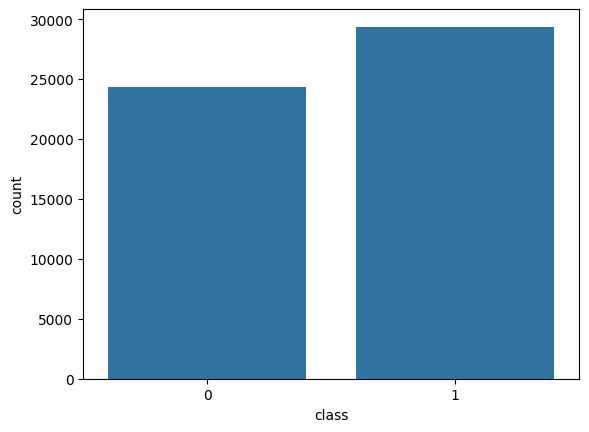

In [8]:
sns.countplot(x='class', data=df);

#### 2 - Dividindo os dados entre X e Y

- X são as Features ou características dos dados
- Y é a Label ou variável alvo que queremos generalizar para novos dados

In [9]:
X = df.drop(['class'], axis=1)
y = df['class']

In [10]:
X.shape, y.shape

((53732, 8), (53732,))

- Dividindo os dados em Treino e Teste

In [11]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=123)

In [12]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((37612, 8), (16120, 8), (37612,), (16120,))

In [13]:
from sklearn.tree import DecisionTreeClassifier

# instanciando o modelo
dtc = DecisionTreeClassifier()

# treinando o modelo
dtc = dtc.fit(X_treino, y_treino)

In [14]:
# prevendo um resultado
previsoes = dtc.predict(X_teste)
previsoes

array([0, 0, 0, ..., 1, 0, 0])

#### 3 - Validando o modelo

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matriz = confusion_matrix(y_teste, previsoes)
print(confusion_matrix(y_teste, previsoes))

[[7144  238]
 [ 194 8544]]


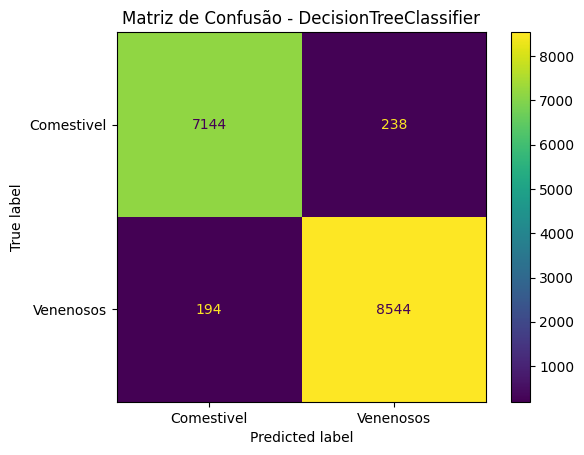

In [16]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['Comestivel', 'Venenosos'])
visualizacao.plot();

plt.title("Matriz de Confusão - DecisionTreeClassifier");
plt.savefig('/home/ryanr/Documentos/ml-mushrooms/imagens/MatrizConfusaoDTC.png')

In [17]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_teste, previsoes)
print("Acurácia do modelo DecisionTreeClassifier - %.2f%%" % (acuracia * 100))

Acurácia do modelo DecisionTreeClassifier - 97.32%


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7382
           1       0.97      0.98      0.98      8738

    accuracy                           0.97     16120
   macro avg       0.97      0.97      0.97     16120
weighted avg       0.97      0.97      0.97     16120

